# Detecting the type of  Skin Disorder Detection


## Business Case:Based on given features and measurement of dataset we need to predict the skin disorder.

#### The dataset consists of information about 6 kinds of skin disorder.The details are as follows:

1The family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.

2.The age feature simply represents the age of the patient.

3.Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3.

4.Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values. 

5.Number of Instances: 366 

6.Number of Attributes: 34

7.Attribute Information: -- Complete attribute documentation: Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated) 
* erythema 
* scaling 
* definite borders 
* itching 
* koebner phenomenon 
* polygonal papules 
* follicular papules 
* oral mucosal involvement 
* knee and elbow involvement 
* scalp involvement 
* family history, (0 or 1) 34: Age (linear) Histopathological Attributes: (take values 0, 1, 2, 3) 
* melanin incontinence 
* eosinophils in the infiltrate 
* PNL infiltrate 
* fibrosis of the papillary dermis 
* exocytosis 
* acanthosis 
* hyperkeratosis 
* parakeratosis 
* clubbing of the rete ridges 
* elongation of the rete ridges 
* thinning of the suprapapillary epidermis
* spongiform pustule 
* munro microabcess 
* focal hypergranulosis 
* disappearance of the granular layer 
* vacuolisation and damage of basal layer 
* spongiosis 
* saw-tooth appearance of retes 
* follicular horn plug 
* perifollicular parakeratosis 
* inflammatory monoluclear inflitrate 
* band-like infiltrate 8. Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'. 

 
Class Distribution: Database: Dermatology Class code: Class: Number of instances: 
1 psoriasis 112 
2 seboreic dermatitis 61 
3 lichen planus 72 
4 pityriasis rosea 49 
5 cronic dermatitis 52 
6 pityriasis rubra pilaris 20 
 

Task:1 Determine which features is impacting for a particular skin disorder (for all classes)

Task:2 Create a machine learning model which will predict the disorder available.

Task:3 Perform the EDA and show the trend of the disease.


## Problem:Multiclass Classification 

### Domain Analysis:Class Distribution:Target Column:

* 1 means--- ' psoriasis' skin disorder.
* 2 means--- ' seboreic dermatitis' skin disorder.
* 3 means--- ' lichen planus' skin disorder.
* 4 means--- ' pityriasis rosea' skin disorder.
* 5 means--- ' cronic dermatitis' skin disorder.
* 6 means--- ' pityriasis rubra pilaris' skin disorder.

### Features Containng values which ranges from 0-3
 FEATURES ARE BASICALLY NAMED AS SYMPTOMS

* 0 indicates that the feature was not present
* 3 indicates the largest amount possible
* 1, 2 indicate the relative intermediate values.
#### Family Feature Contains
* 1--> If any of these diseases has been observed in the family
* 0--> Not there in the family.



















## Importing the libraries

In [1]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

In [2]:
#Loading the data
data = pd.read_csv('dataset_35_dermatology.csv')

## Basic Checks

In [3]:
pd.set_option("display.max_columns",100)

In [4]:
# Reading Ist five rows
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [5]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

1. Feature "Age" is in object type

2. All other features are of integer type

### STATISTICAL MEASURE OF DATA

In [7]:

data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


* Almost every feature contains 4 unique values 0,1,2,3.
* Min. value is 0 and Max. value is 3
* 366 observations are present in this dataset.
* No constant column is there in dataset.

In [8]:
data.describe(include="object")

,Age
count,366
unique,61
top,40
freq,17


* Total no. of observations are 366.
*  61 unique observations are there in "Age" feature.
* 17 observations are there of "Age = 40".

In [9]:
data.shape

(366, 35)

In [10]:
data.size  

12810

* Total number of observed values present in the dataset. (no. of rows(366) * no. of columns(35))

### Corrupt data handling

In [11]:
data.loc[data['Age']=="?","Age"]=np.nan

In [12]:
data[["Age"]]=data[["Age"]].astype("float64")

## Exploratory data Analysis

####  FIRSTLY CONVERTING THE VALUES OF CLASS TO NAMES OF SKIN DISORDER FOR BETTER UNDERSTANDING OF EDA

In [13]:
data["class"]=data['class'].map({1:'psoriasis',
                           2:'seboreic_dermatitis', 
                           3:'lichen_planus', 
                           4:'pityriasis_rosea', 
                           5:'cronic_dermatitis', 
                           6:'pityriasis_rubra_pilaris'
                        })

### Visualizing the Target Column 

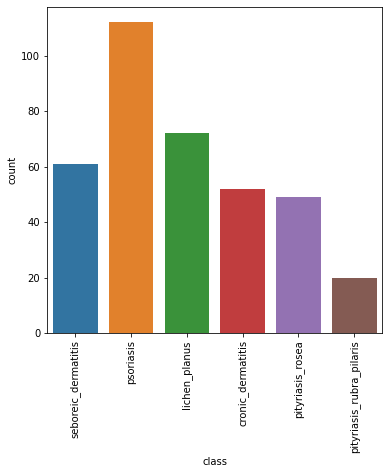

In [14]:
plt.figure(figsize=(6,6), facecolor='white')
sns.countplot(x=data["class"])
plt.xticks(rotation=90)
plt.show()

Observation:
* According to dataset it can be seen that there are highest number of people who are suffering from " psoriasis " skin disorder.
    
* 30% of data is covered by this skin disorder only.

* Skin disorders namely " seboreic_dermatitis" , " lichen_planus " , " cronic_dermatitis " and "pityriasis_rosea " heave intermediate range of affecting.

* If we talk about " pityriasis_rubra_pilaris " skindisorder , it has least value of affecting to the people.

### CHECKING IF AGE MATTERS IN DETECTING THE TYPE OF SKIN DISORDER

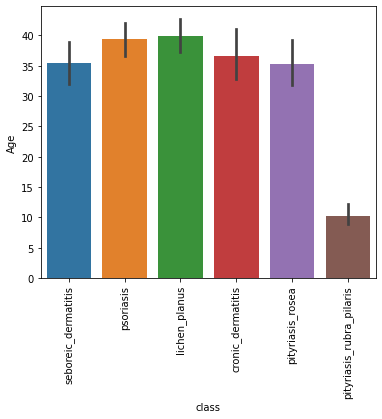

In [15]:
plt.figure(figsize=(6,5), facecolor='white')
sns.barplot(x=data["class"],y=data["Age"])
plt.xticks(rotation=90)
plt.show()

Observation:
1. The main thing we can conclude from this comparision that "pityriasis_rubra_pilaris" skin disorder effects almost 0 - 10 years age group people.

2. It means this skin disorder only affects children.

3. Where as rest 5 skin disorders can take place at any age.

### ERYTHEMA, SCALING AND CLASS

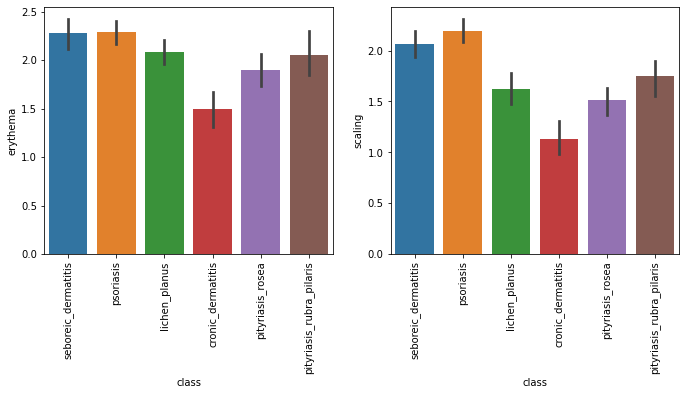

In [16]:
data1=data[["erythema","scaling"]]
plt.figure(figsize=(30,10), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
        plt.xticks(rotation=90)
    plotnumber+=1  

plt.show()

Observation:

1.In all type of skin disorders intermediate level of Scaling and Erythema is present as no observation exceeding 2.5

2.But comparatively, less in cronic_dermatitis skin disorder.

### THOSE IMPORTANT FEATURES/SYMPTOMS, ON THE BASIS OF WHICH WE CAN SAY THAT THIS PATIENT MAY HAVE THIS DISEASE

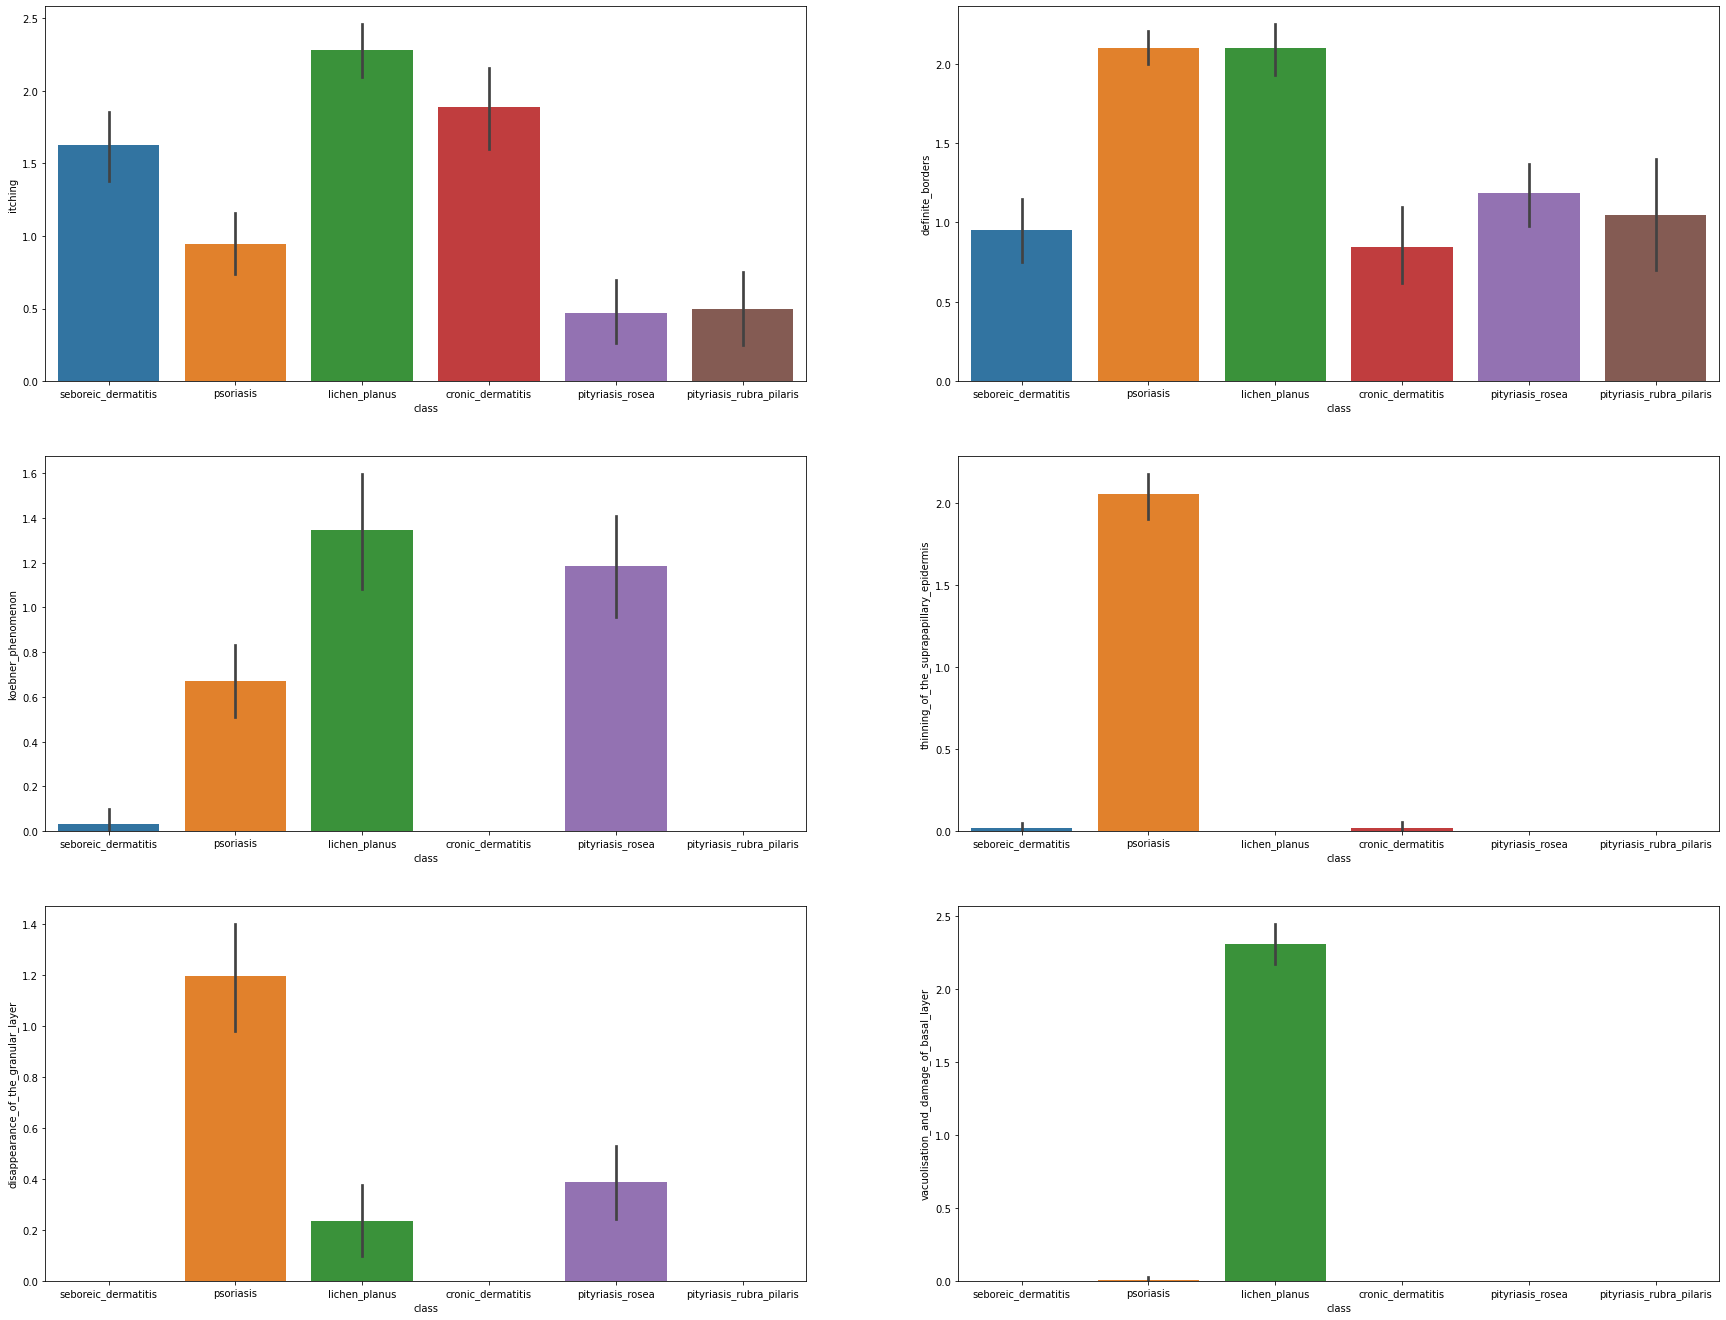

In [17]:
data1=data[["itching",'definite_borders','koebner_phenomenon','thinning_of_the_suprapapillary_epidermis','disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer']]
plt.figure(figsize=(30,40), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
        
    plotnumber+=1  

plt.show()

### 1.ITCHING
Lichen_planus skin disorder have high effect from itching followed by cronic_dermatitis skin disorder, it means
If a person is getting more itching then there may be more chances that he has Lichen_planus or cronic_dermatitis skin disorder .
Rest other skin disorders have intermediate level of itching effect.
Whereas the skin disorder namely "pityriasis_rosea" and "pityriasis_rubra_pilaris" have minor affect of itching

### 2.DEFINATE BORDERS
When person have a skin disorder of "psoriasis" and "lichen planus" then person have their definate border of the skin means it does not affect the borders of skin , border of thier skin remain regular in shape.
Where as other skin disorders make the border of skin in irregular shape.

### 3.KOEBNER PHENOMENON ( Appearance of new skin to abnormal skin like birthmarks etc)
Manytimes in the case of "lichen planus" and "pityriasis_rosea" skin disorder , this phenomenon takes place.
And sometimes in psoriasis also.

### 4.THINNING OF SUPRAPAPILLARY EPIDERMIS( Some areas of body like palms amd soles) AND DISAPPEARE OF GRANULAR LAYER
our graph says that if our suprapapillary epidermis get thinned and granular layer get disappeared than 90% chance of "psoriasis" skin disorder.

### 5.DAMAGE OF BASAL LAYER( basal layer is the innermost layer of the epidermis)
When we have damage of basal layer in our skin then the most chance of suffering from "lichen planus " skin disorder.

### CONNETION OF KNEE,ELBOW AND SCALP WITH SKIN DISORDERS

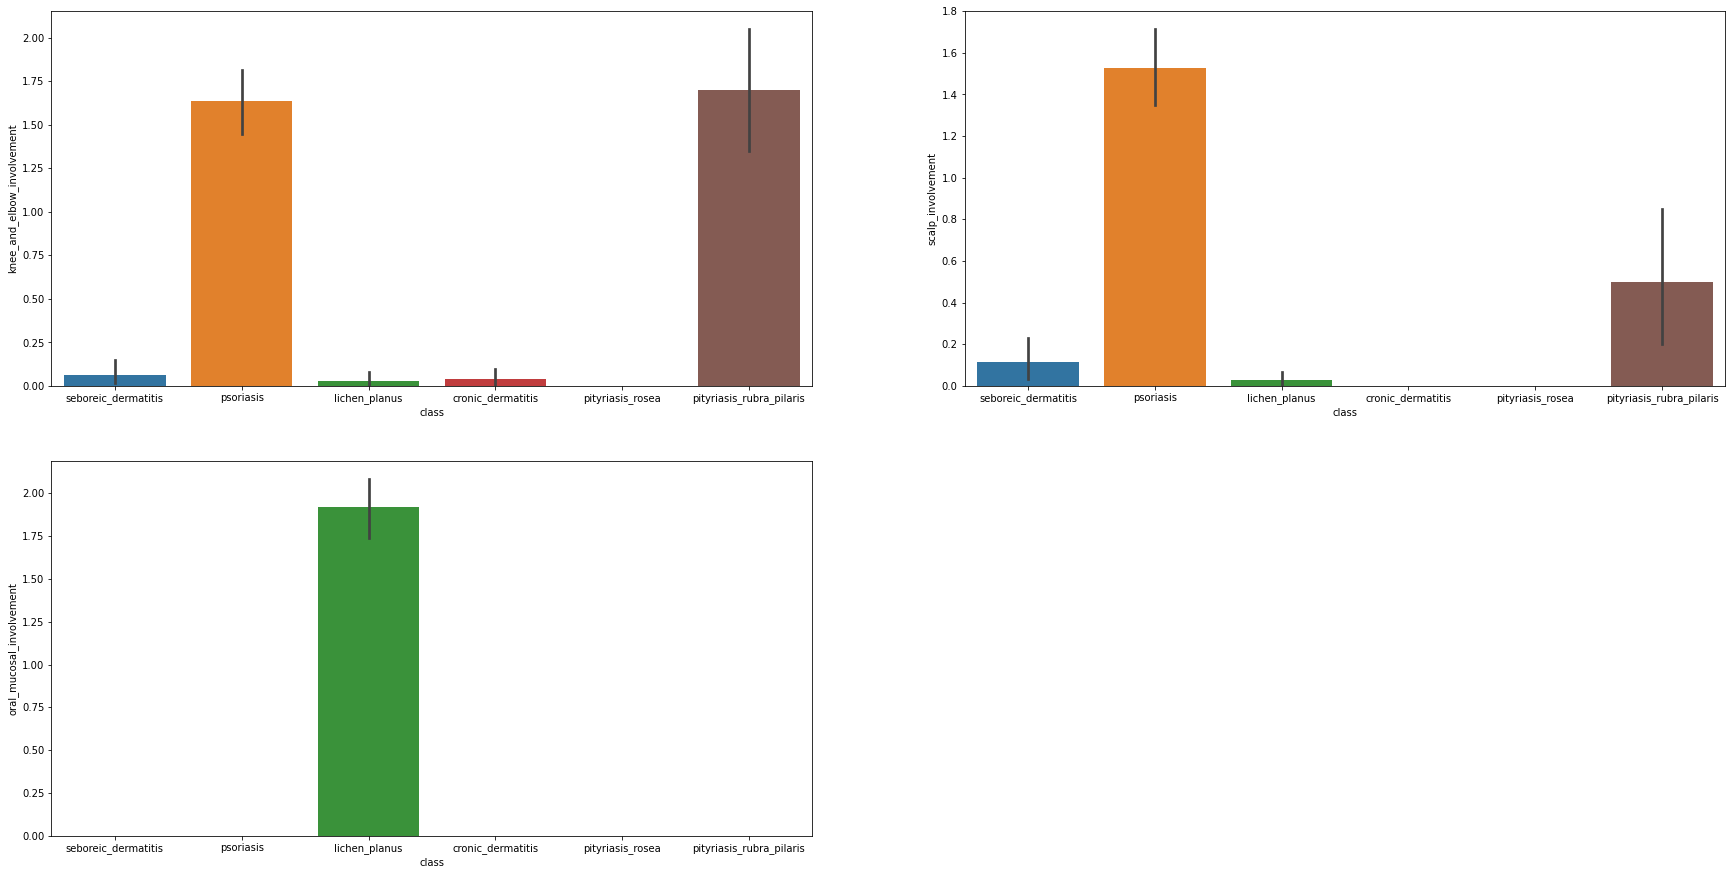

In [18]:
data1=data[["knee_and_elbow_involvement","scalp_involvement",'oral_mucosal_involvement']]
plt.figure(figsize=(30,40), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel('class')
    plotnumber+=1  

plt.show()

* Here if we talk about "pityriasis_rubra_pilaris" skin disorder it highly affect the knees, elbows and sometimes scalp is well.
* Whereas 90% "psoriasis" skin disorder takes place in all these three body parts that is kness,elbows and scalp.
* Only "lichen_planus" skin disorder is have symptom in the mouth (oral_mucosal_involvement). This give rise to swelling to the many parts of mouth like lips .
* Rest other skin disorders takes place on other body parts.

### TYPES OF PAPULES' EFFECT ON SKIN DISORDER

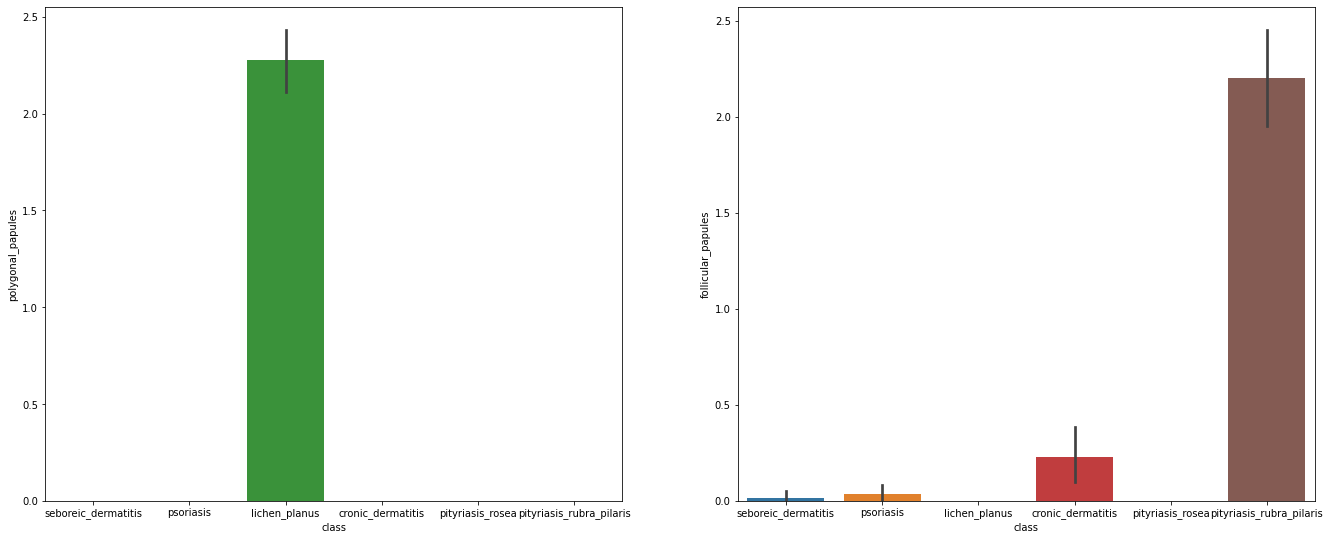

In [19]:
data1=data[['polygonal_papules', 'follicular_papules']]
plt.figure(figsize=(60,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,5,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()


* Only "lichen_planus" skin disorder is affected by polygonal_papules, it means that if a person have polygonal_papules it is a symptom of "lichen_planus72" skin disorder.
* If we talk about "pityriasis_rubra_pilaris20" skin disorder it has symptom of follicular_popules



### HOW PRESENCE OF EOSINOPHILS , PNL , MONONUCLEAR IN THE BODY helps in detecting SKIN Disease

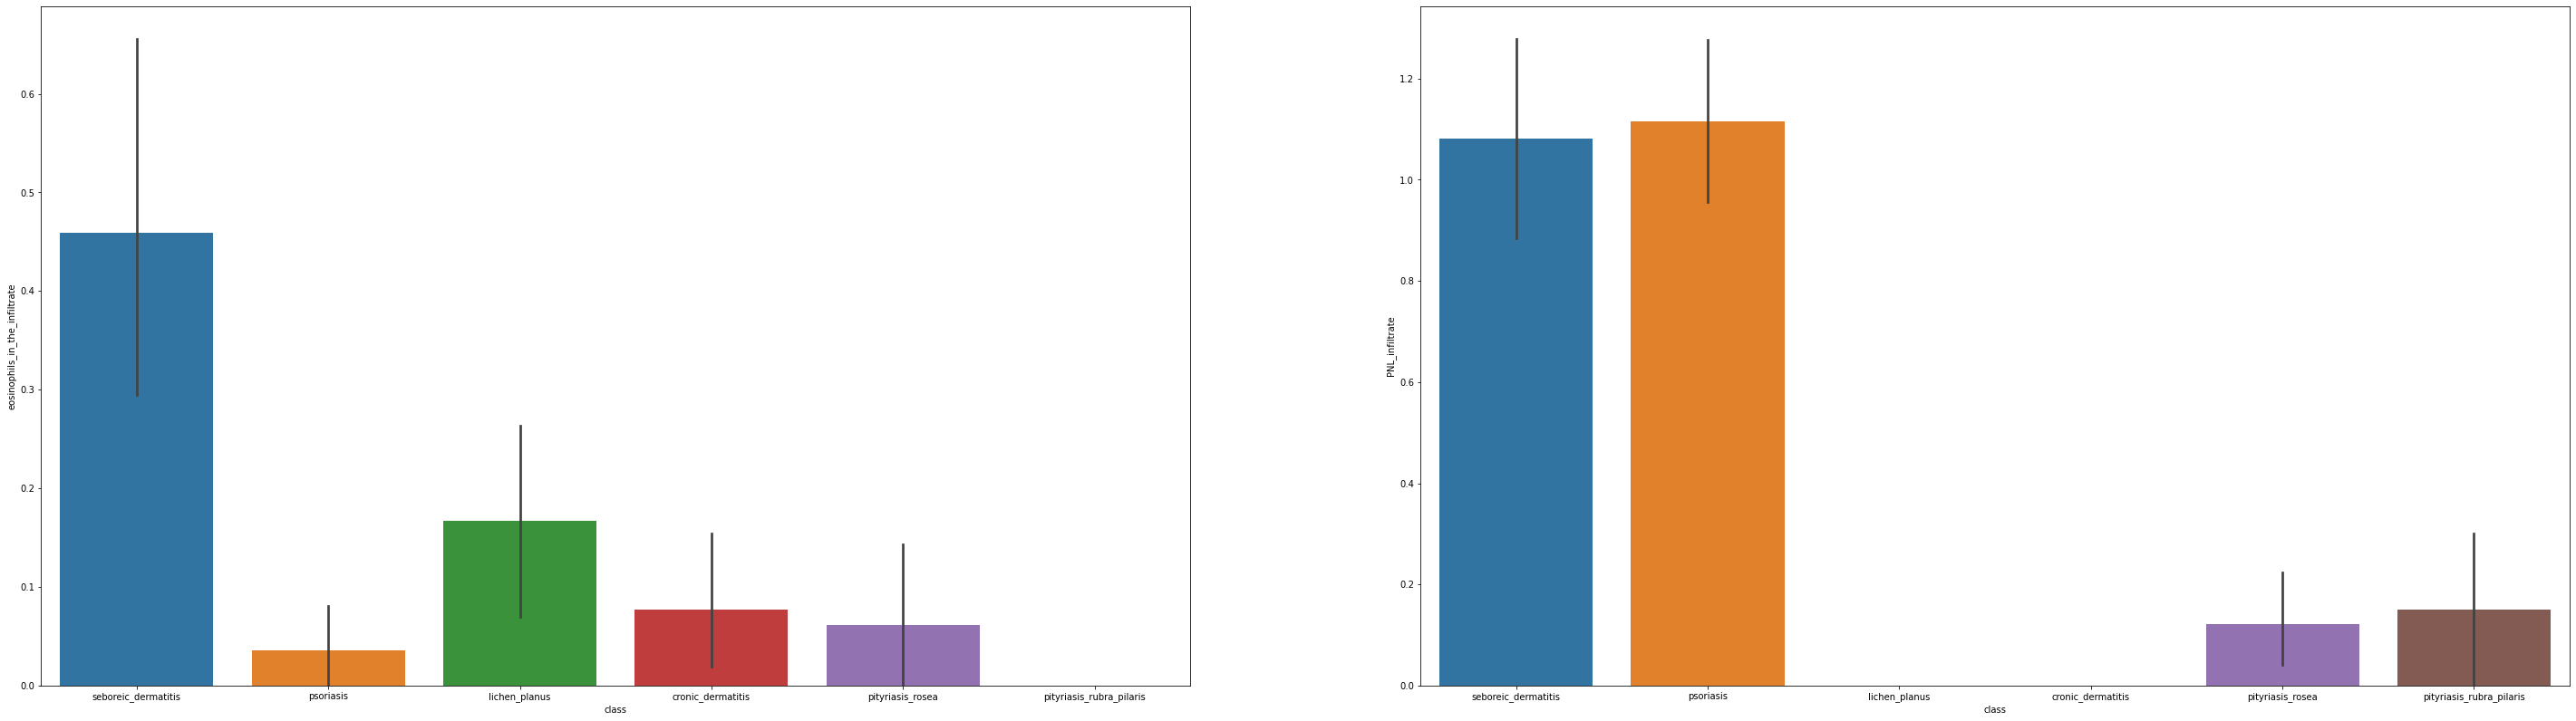

In [20]:
data1=data[['eosinophils_in_the_infiltrate', 'PNL_infiltrate']]
plt.figure(figsize=(50,80), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

### EOSINOPHILLS INFILTRATE
1.These are the enterence of white blood cells in lungs.
2.If you see the graph clearly the values of this process is less than 0.5 this means eosinophills infiltrate process is very less in all type of skin disorder, so we can say that this process is not effecting much to get skin disorder to person.
### PNL INFILTRATE
1..This is the presence of big stone in body
2.Except "seboreic_dermatitics" and "psoriasis" , PNL infiltrate process is also not much affecting to other skin disorders.

3..It has imtermediate affect to "seboreic_dermatitics" and "psoriasis" skin disorder.

### IMPACT OF MELANIN AND ACANTHOSIS ON SKIN DISORDER

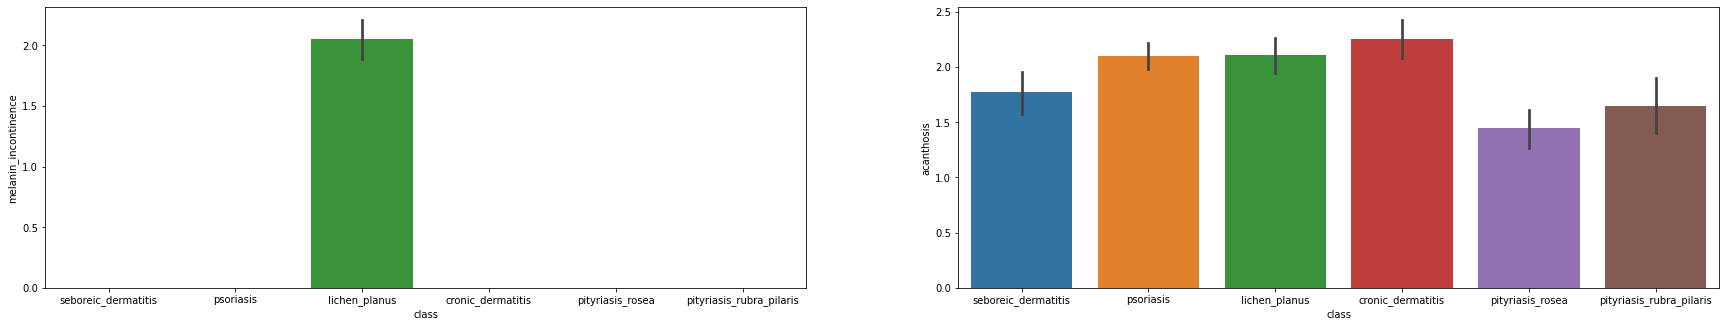

In [21]:
data1=data[["melanin_incontinence",'acanthosis']]
plt.figure(figsize=(30,30), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

### MELANIN_INCONTIENENCE
* Melanin is a dark brown to black pigment occurring in the hair, skin, and iris of the eye in people.
*When we have symptoms of melanin then we have fully chnance to get suffer from "lichen_planus" skin disorder.
###ACANTHOSIS
*There is a presence of acanthosis in every skin disorder so this is not very informatory.

### HOW SKIN DISORDER PRESENT IN THE FAMILY EFFECTS

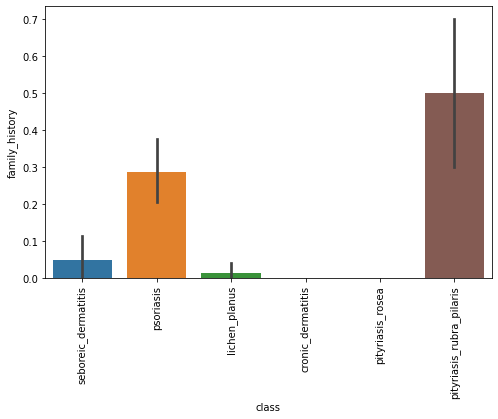

In [22]:
plt.figure(figsize=(8,5),facecolor="white")
sns.barplot(x=data["class"],y=data["family_history"])
plt.xticks(rotation=90)
plt.show()

* There is more change of suffering from "pityriasis_rubra_pilaris" skin disorder if their parents have same skin disorder and that is the only reason this disorder mostly suffered by childern.
* Sometimes "Psoriasis" skin disorder can also takes place from family to thier children.
* There are also minor cases of "seboris dermatitis" amd "lichen planus" which occur from parents to their children

### EFFECT TO SKIN DISORDERS BY THE PROCESSESS WHICH MAKE SKIN CELLS

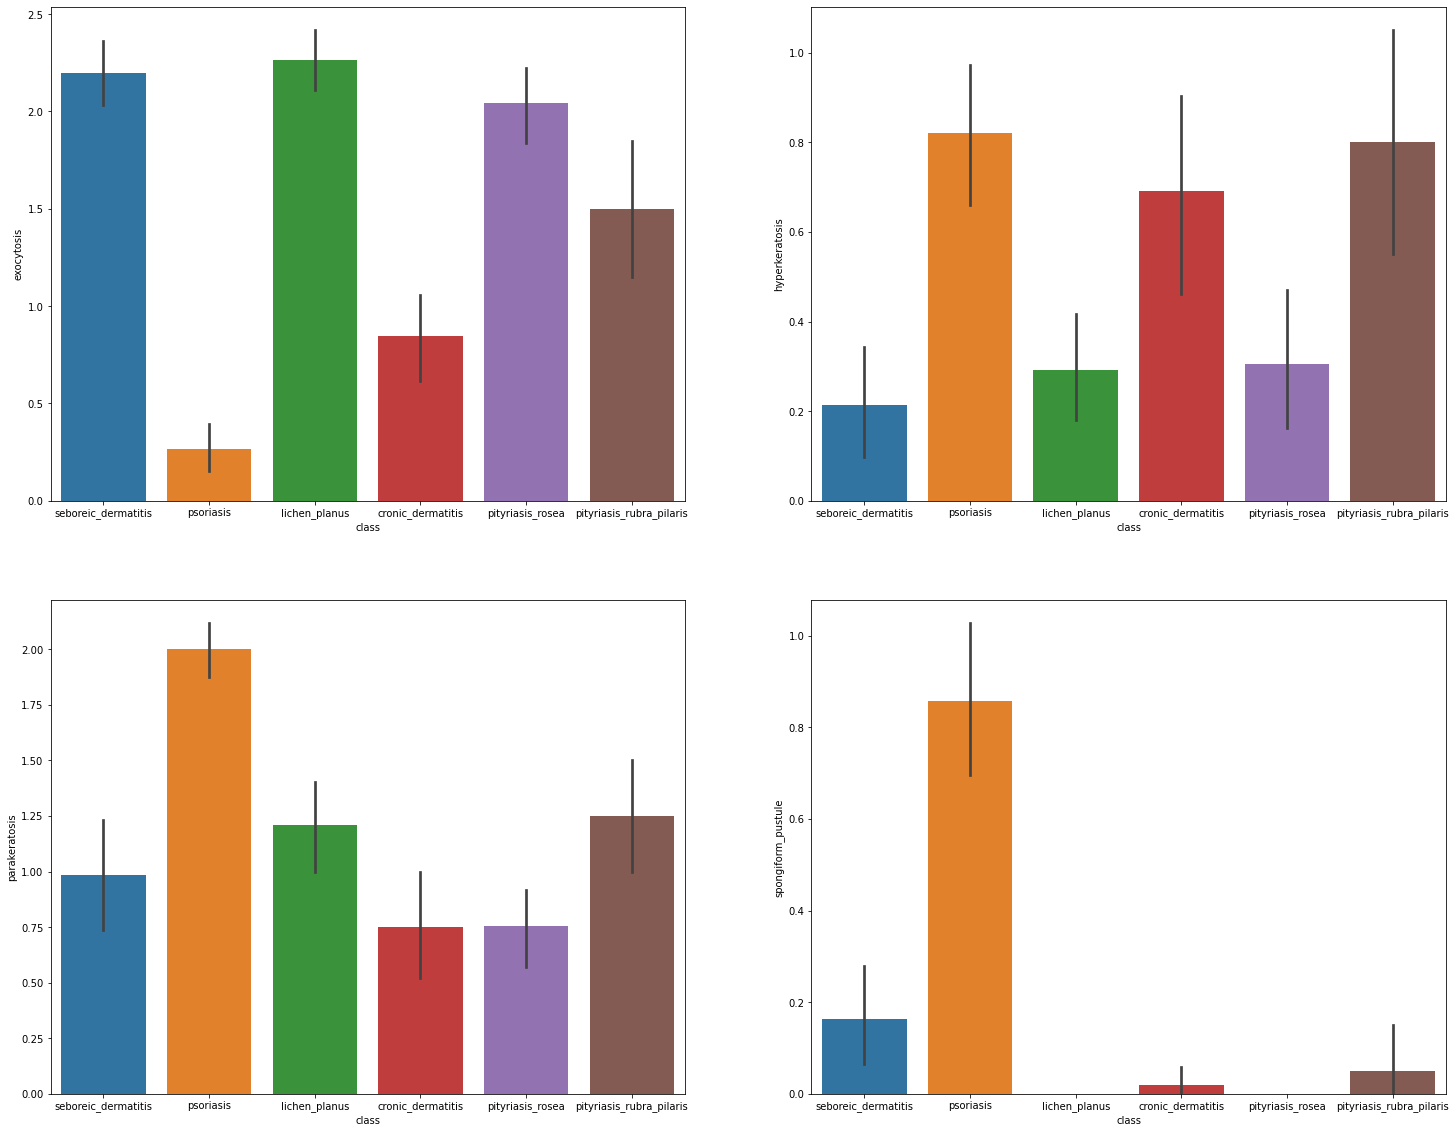

In [23]:
data1=data[['exocytosis','hyperkeratosis', 'parakeratosis','spongiform_pustule']]
plt.figure(figsize=(25,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

* If we talk about features Hyperkeratosis and Spongiform postule , these are not much affecting any skin disorder baecause these have less value range that is below 1.
### EXOCYTOSIS
* Exocytosis is a form of active transport and bulk transport in which a cell transports molecules out of the cell.
* Skin disoreders such as "lichen_planus" , "ptyriasis_rosea" and "seboreic dermatis " get more affect by Exocytosis symptom comparitevy to others.
"pityriasis_ruba_pilaris" disorder have intermmediate effect of this process.
* Rest have minor effects.
### PARAKERATOSIS
* Parakeratosis is defined as the presence of nucleated keratinocytes(cells which make keratin)
* All skin disorders have intermediate effect of it.

### REMAINING FEATURE ANALYSIS

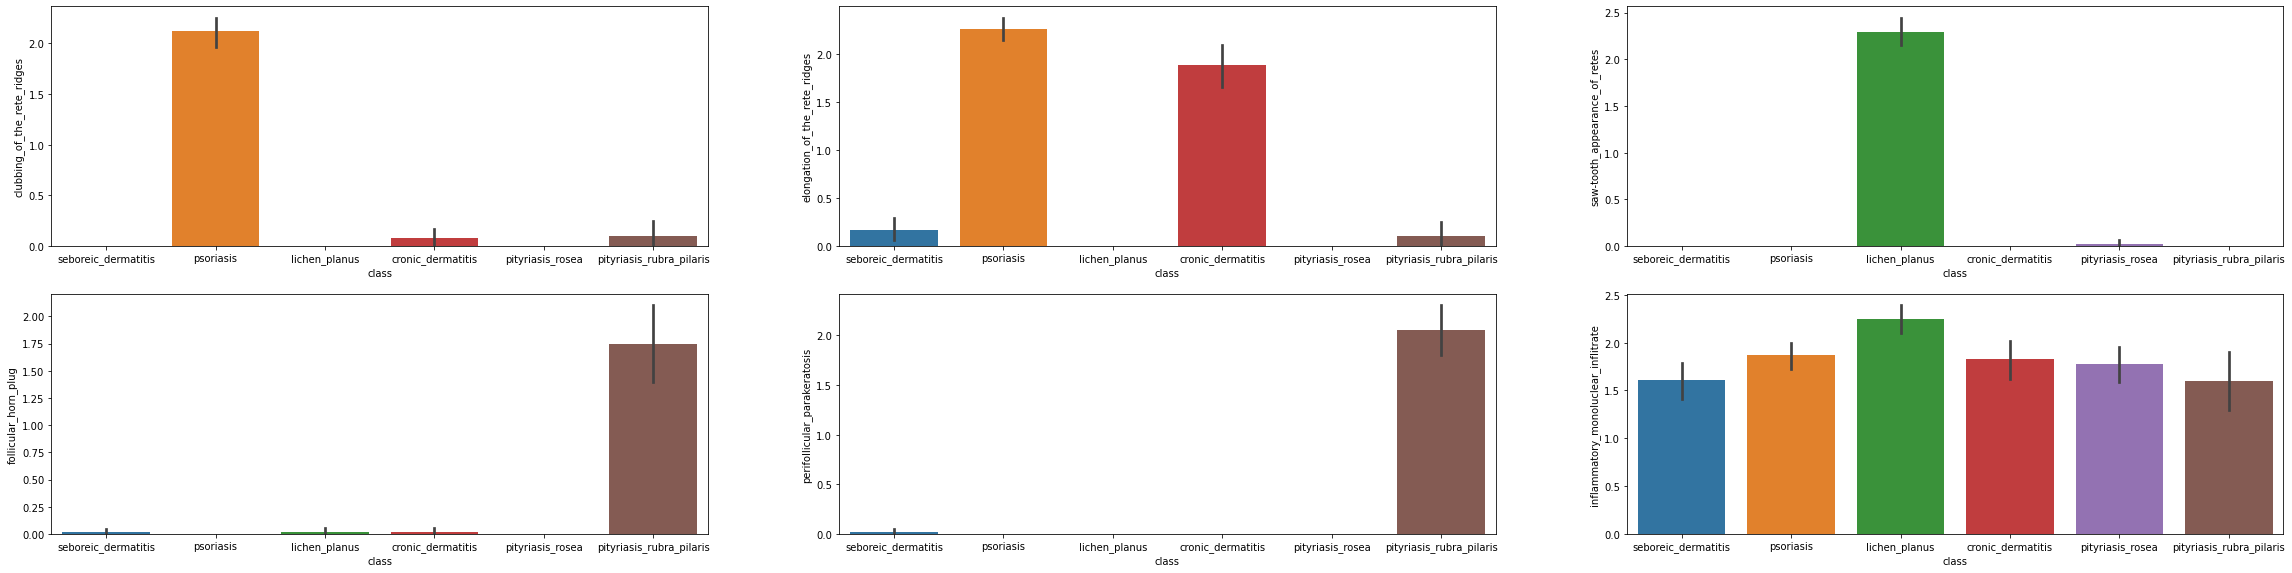

In [24]:
data1=data[['clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges','saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate']]
plt.figure(figsize=(40,15), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(3,3,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

### IMPACT OF SPONGIOSIS TO SKIN DISORDER

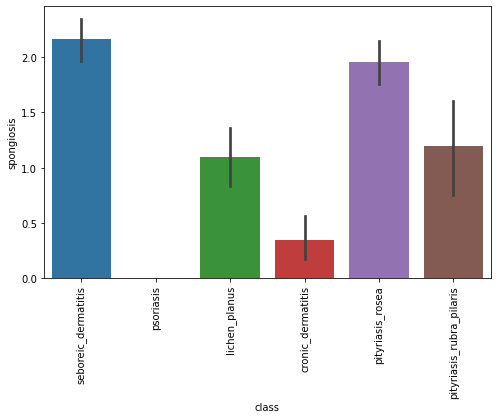

In [25]:
plt.figure(figsize=(8,5),facecolor="white")
sns.barplot(x=data["class"],y=data["spongiosis"])
plt.xticks(rotation=90)
plt.show()

Spongiotic dermatitis refers to dermatitis that involves fluid buildup in your skin.This process is known as spongiosis.

* Spongiosis highly give affect to "seboreic_dermatitis " disorder.
*Skin disorders like "pityruais_rosea", "pityriasis_rubra_pilaris" ," lichen_planus" are imtermediately affect by spongiosis.

### FEATURES THAT EFFECTING THE MOST TO THE PARTICULAR SKIN DISORDER
##### 1. PSORIASIS
* FEATURES GIVEN BELOW EFFECT THIS SKIN DISORDER MOST

* scalp_involvement
* parakeratosis
* thinning_of_the_suprapapillary_epidermis
* clubbing_of_rete_ridges

### PROOF

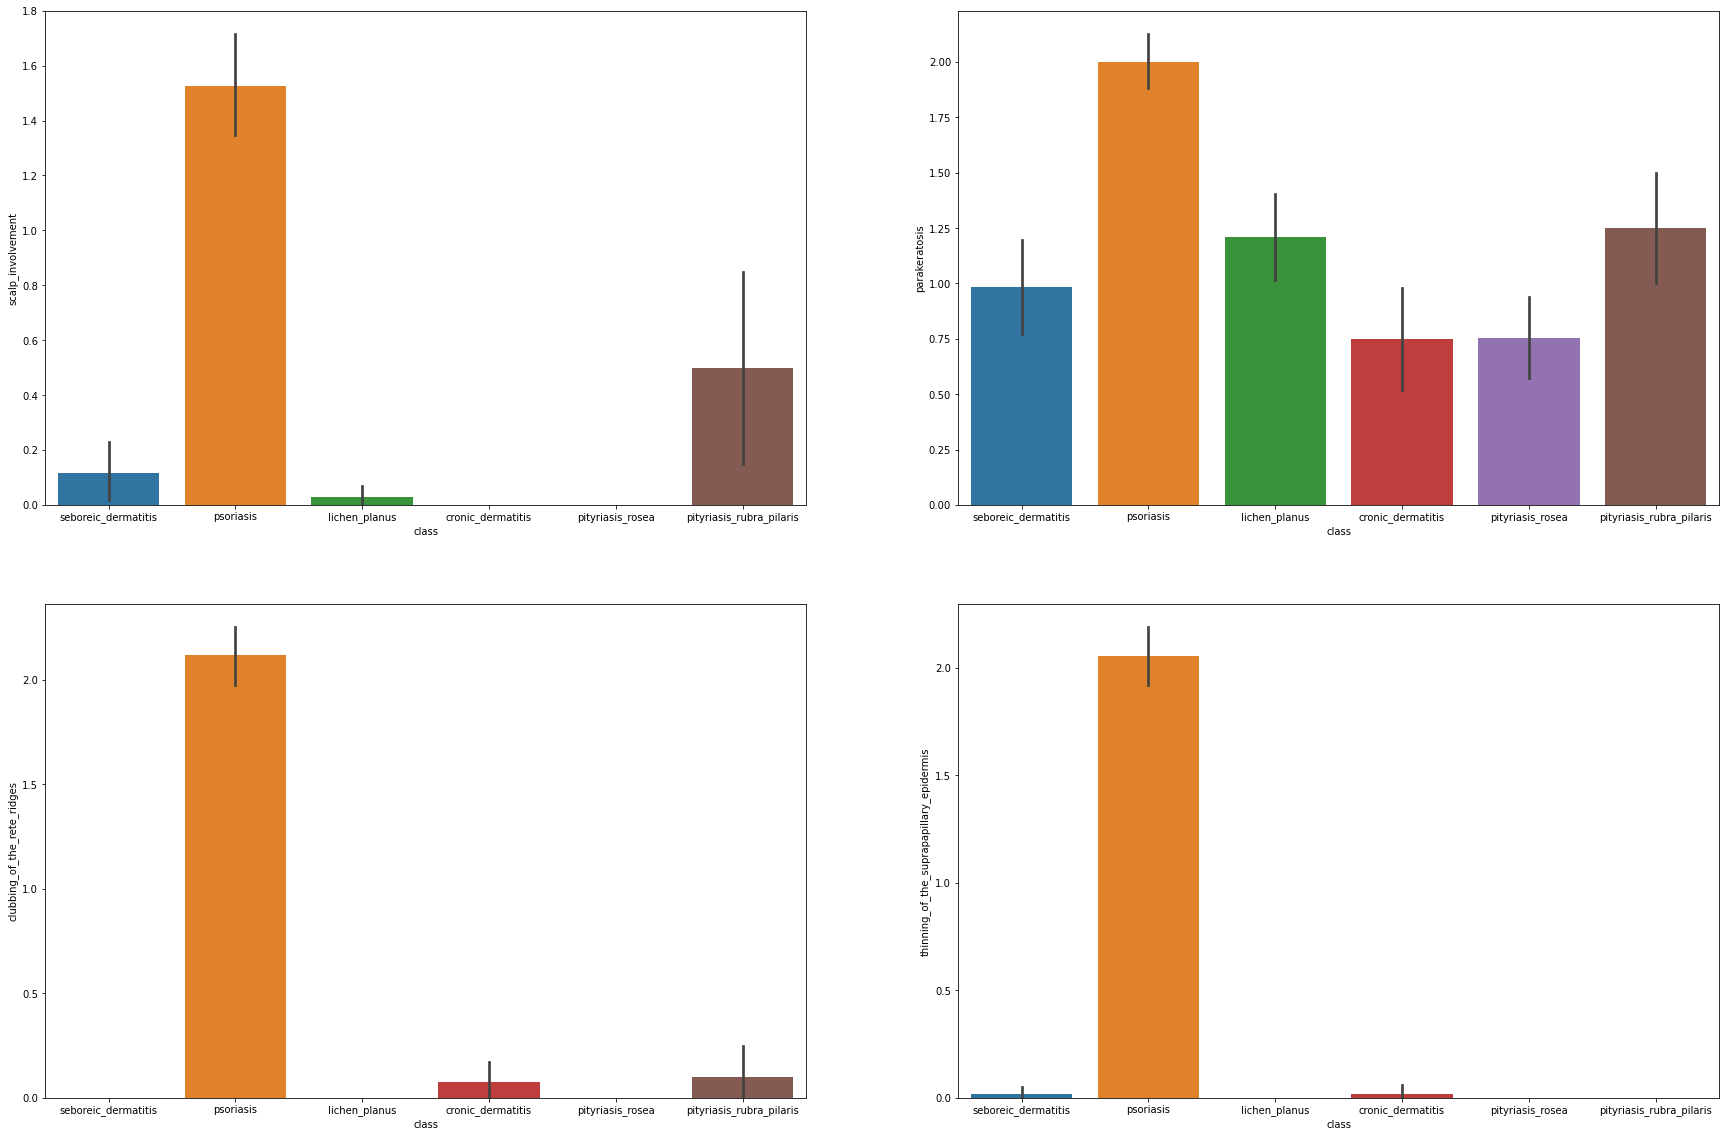

In [26]:
data1=data[["scalp_involvement","parakeratosis","clubbing_of_the_rete_ridges","thinning_of_the_suprapapillary_epidermis"]]
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

* In every graph above, the bin of "psoriasis "(orange bin) skin disorder is high.
* Hence we can conclude that this skin disorder is highly effected by these features.
### 2. SEBOREIC_DEREMATITIS
FEATURES GIVEN BELOW EFFECTS THIS SKIN DISORDER MOST

* exocytosis
*spongiosis


### PROOF

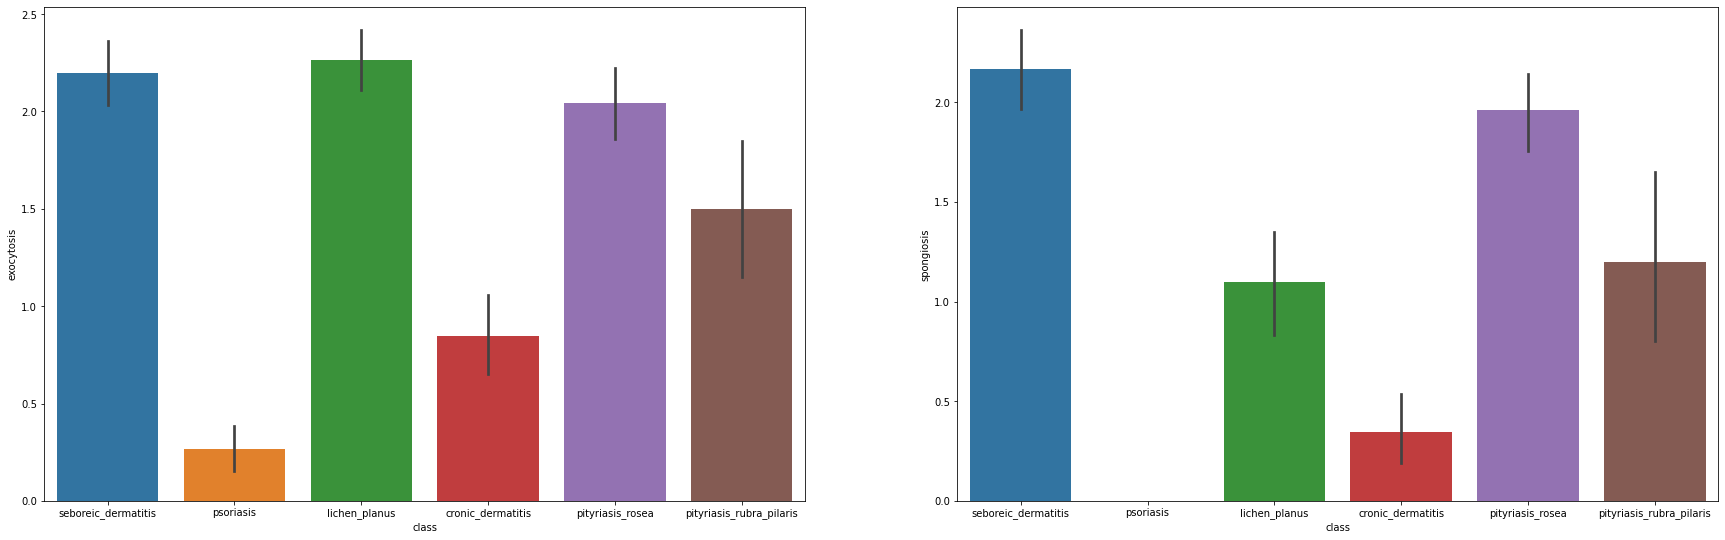

In [27]:
data1=data[["exocytosis","spongiosis"]]
plt.figure(figsize=(30,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,2,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()


### 3. LICHEN_PLANUS
FEATURES GIVEN BELOW EFFECTS THIS SKIN DISORDER MOST

* polygonal_papules
* oral_mucosal_involvement
* vacuolisation_and_damage_of_basal_layer
* melanin_incontinence
*exocytosis
*saw-tooth_appearance_of_retes

### PROOF

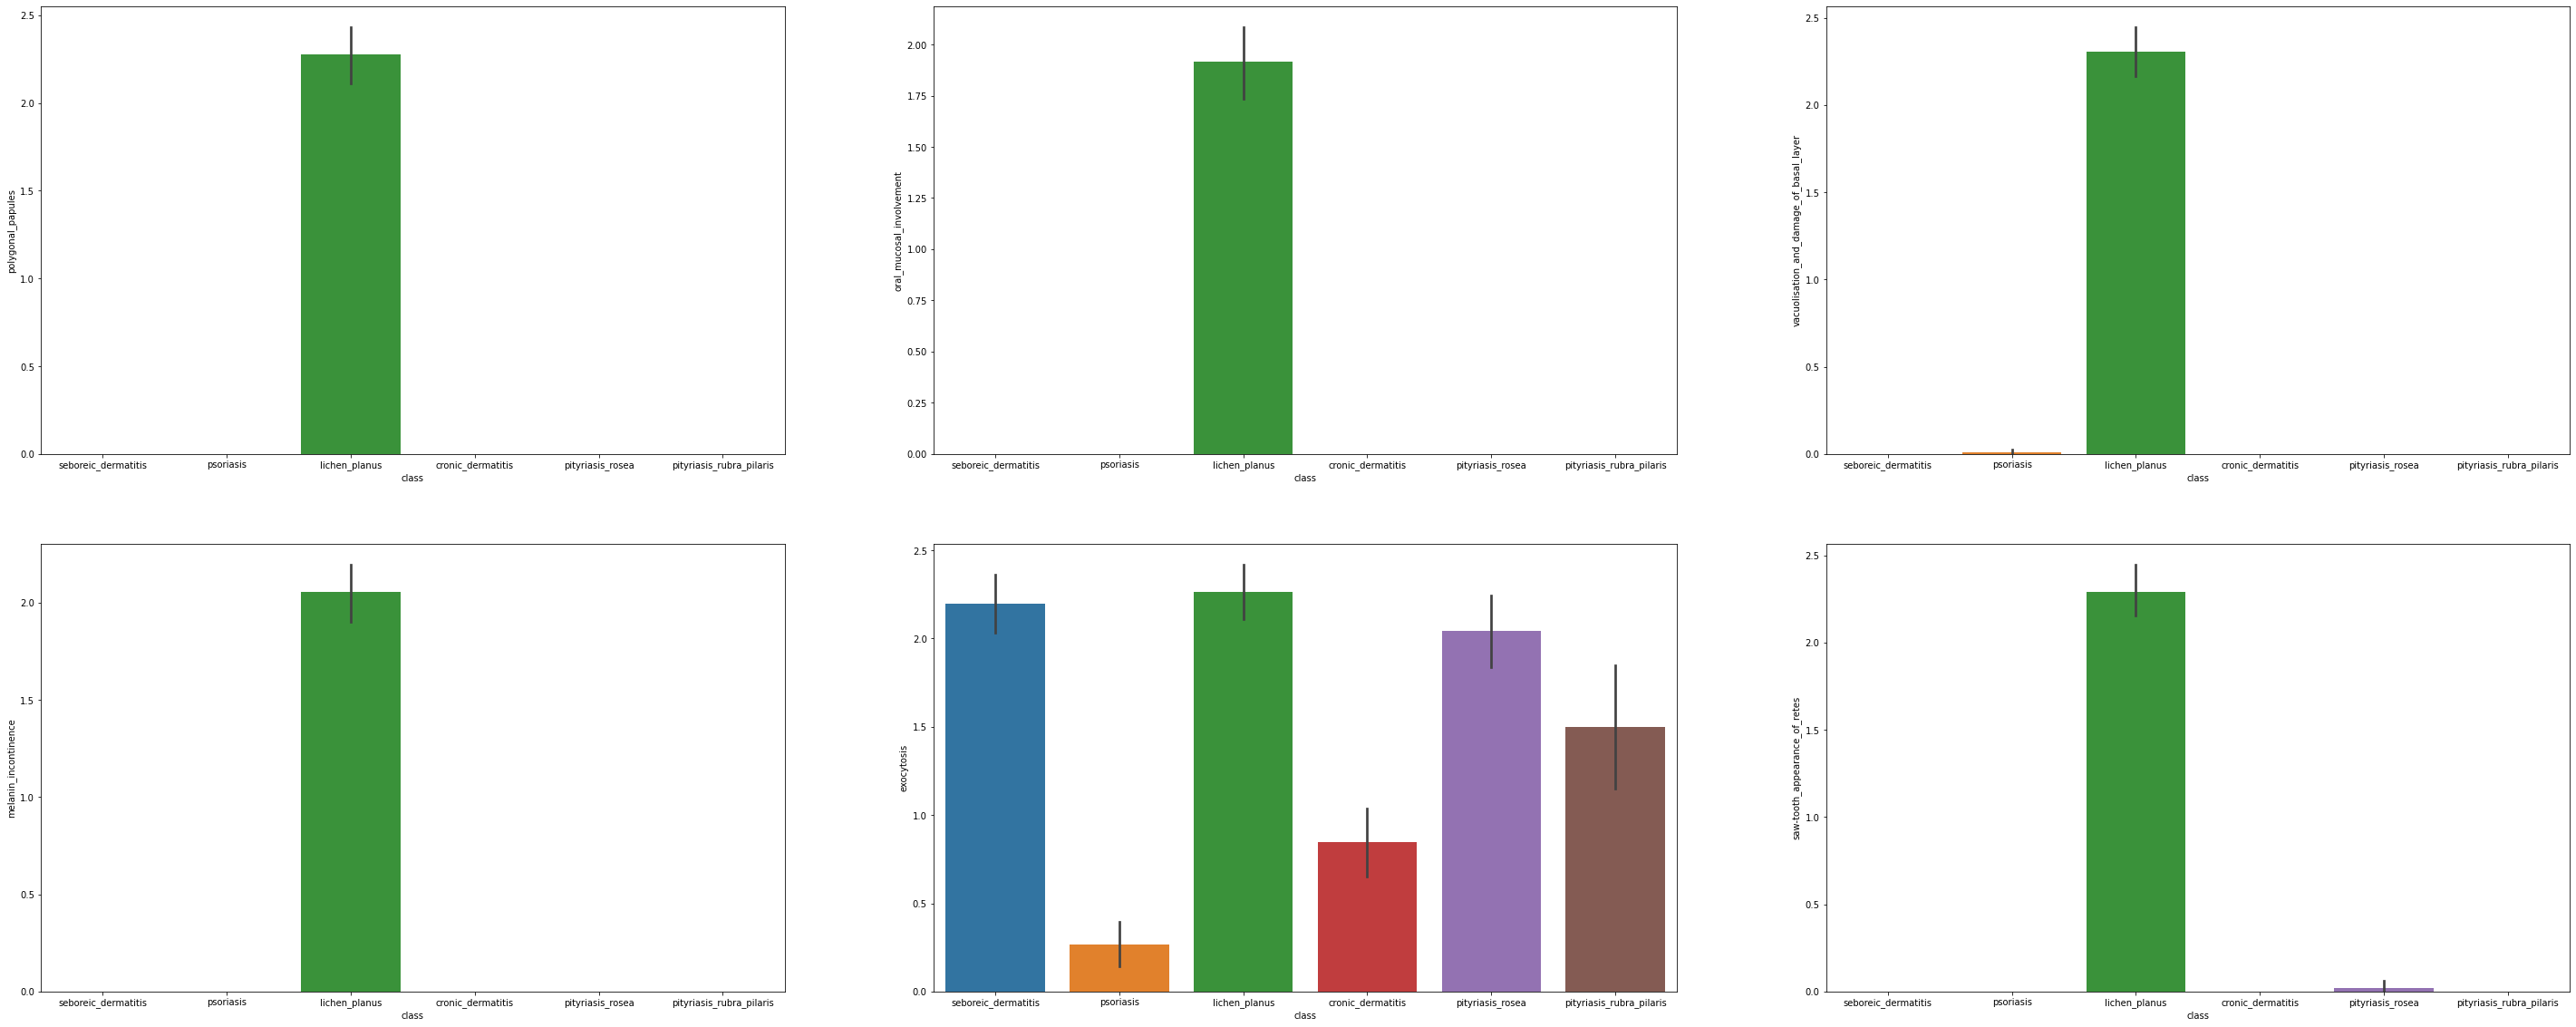

In [28]:
data1=data[[ "polygonal_papules",
"oral_mucosal_involvement",
"vacuolisation_and_damage_of_basal_layer",
"melanin_incontinence",
"exocytosis",
"saw-tooth_appearance_of_retes"]]
plt.figure(figsize=(50,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,3,plotnumber)
        sns.barplot(y=data1[i],x=data["class"],)
        plt.xlabel("class")
    plotnumber+=1  

plt.show()


* Here, in each graph "lichen_planus" skin disorder's bin is high(green bin) .
* Hence we conclude that this disorder is highly effected by these featutes
### 4. PITYRIASIS_ROSEA
FEATURES THAT EFFECT THIS SKIN DISORDER IS GIVEN BELOW

* exocytosis

### PROOF

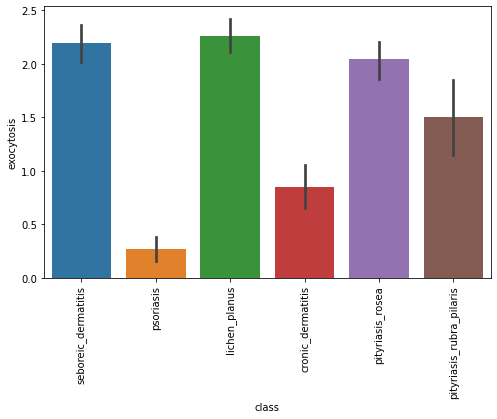

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x=data["class"],y=data["exocytosis"])
plt.xticks(rotation=90)
plt.show()

### 5.CRONIC_DERMATITIS
* COLUMNS THAT EFFECTS THIS SKIN DISORDER ARE GIVEN :

* elongation_of_the_rete_ridges
### PROOF:

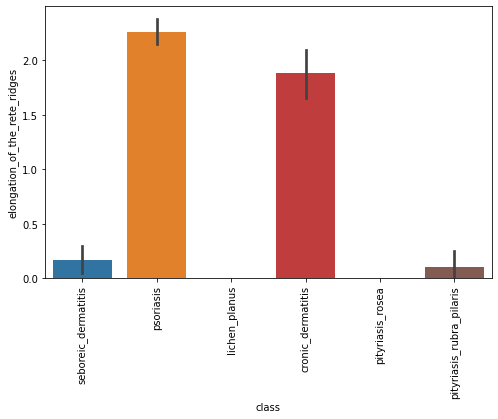

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(y=data["elongation_of_the_rete_ridges"],x=data["class"])
plt.xticks(rotation=90)
plt.show()

* It can be seen that along with "psoriasis" it is the second most effecting.
* This feature is one which effects this skin disorder
### 6. PITYRIASIS_RUBRA_PILARIS
* FEATURES EFFECTING THIS DISORDER MOST ARE AS FOLLOWS

* knee_elbow_involvement
* follicular_papules
* perifollicular_parakeratosis
* follicular_horn_plug

### PROOF

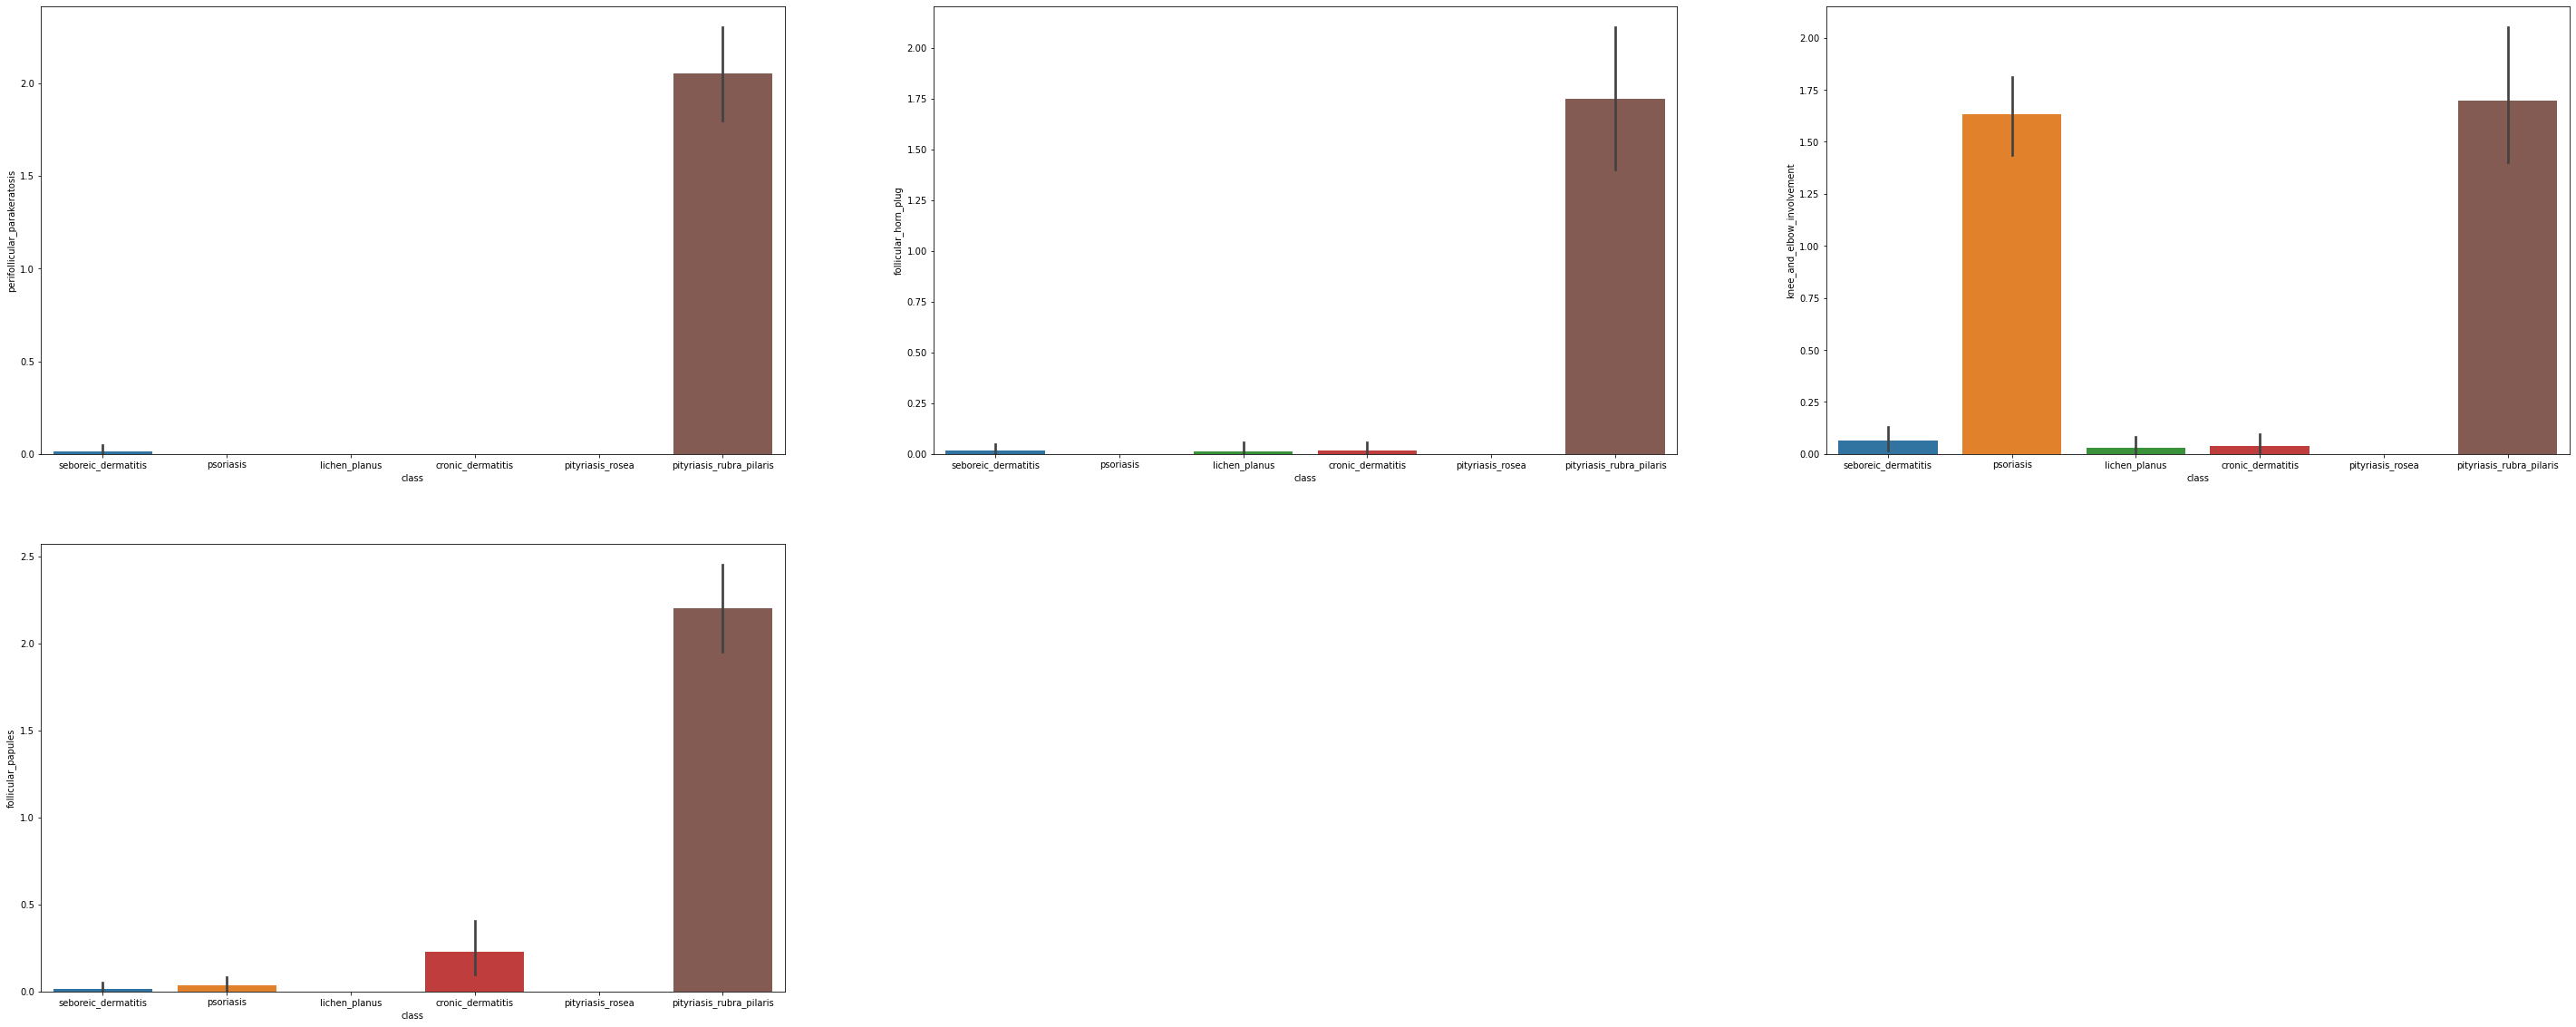

In [31]:

data1=data[["perifollicular_parakeratosis","follicular_horn_plug","knee_and_elbow_involvement","follicular_papules"]]
plt.figure(figsize=(50,20), facecolor='white')
plotnumber=1
for i in data1:
    if plotnumber<=10:
        plt.subplot(2,3,plotnumber)
        sns.barplot(y=data1[i],x=data["class"])
        plt.xlabel("class")
    plotnumber+=1  

plt.show()

### If you see the graphs above, the brown bin is of pityriasis_rubra skin disorder.
So this is the only bin in these graph which is higher than all others. hence, this skin disorder is most effectd by these features.

## Data Preprocessing

#### CHECKING NULL VALUES:

In [32]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [33]:
# Check median for Age column
np.median(data.Age.dropna(axis=0))

35.0

In [34]:
# Replace the nan values in Age column with median value
data.loc[data['Age'].isnull()==True,'Age']=np.median(data.Age.dropna(axis=0))

In [35]:
data.Age.isnull().sum()

0

In [36]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

### Handling corrupted values

In [37]:
data.loc[data['Age']=="?","Age"]=0

In [38]:
data[["Age"]]=data[["Age"]].astype("int64")

In [39]:
data.loc[data["Age"]==0,"Age"]=data["Age"].median()

## Feature Selection

<AxesSubplot:>

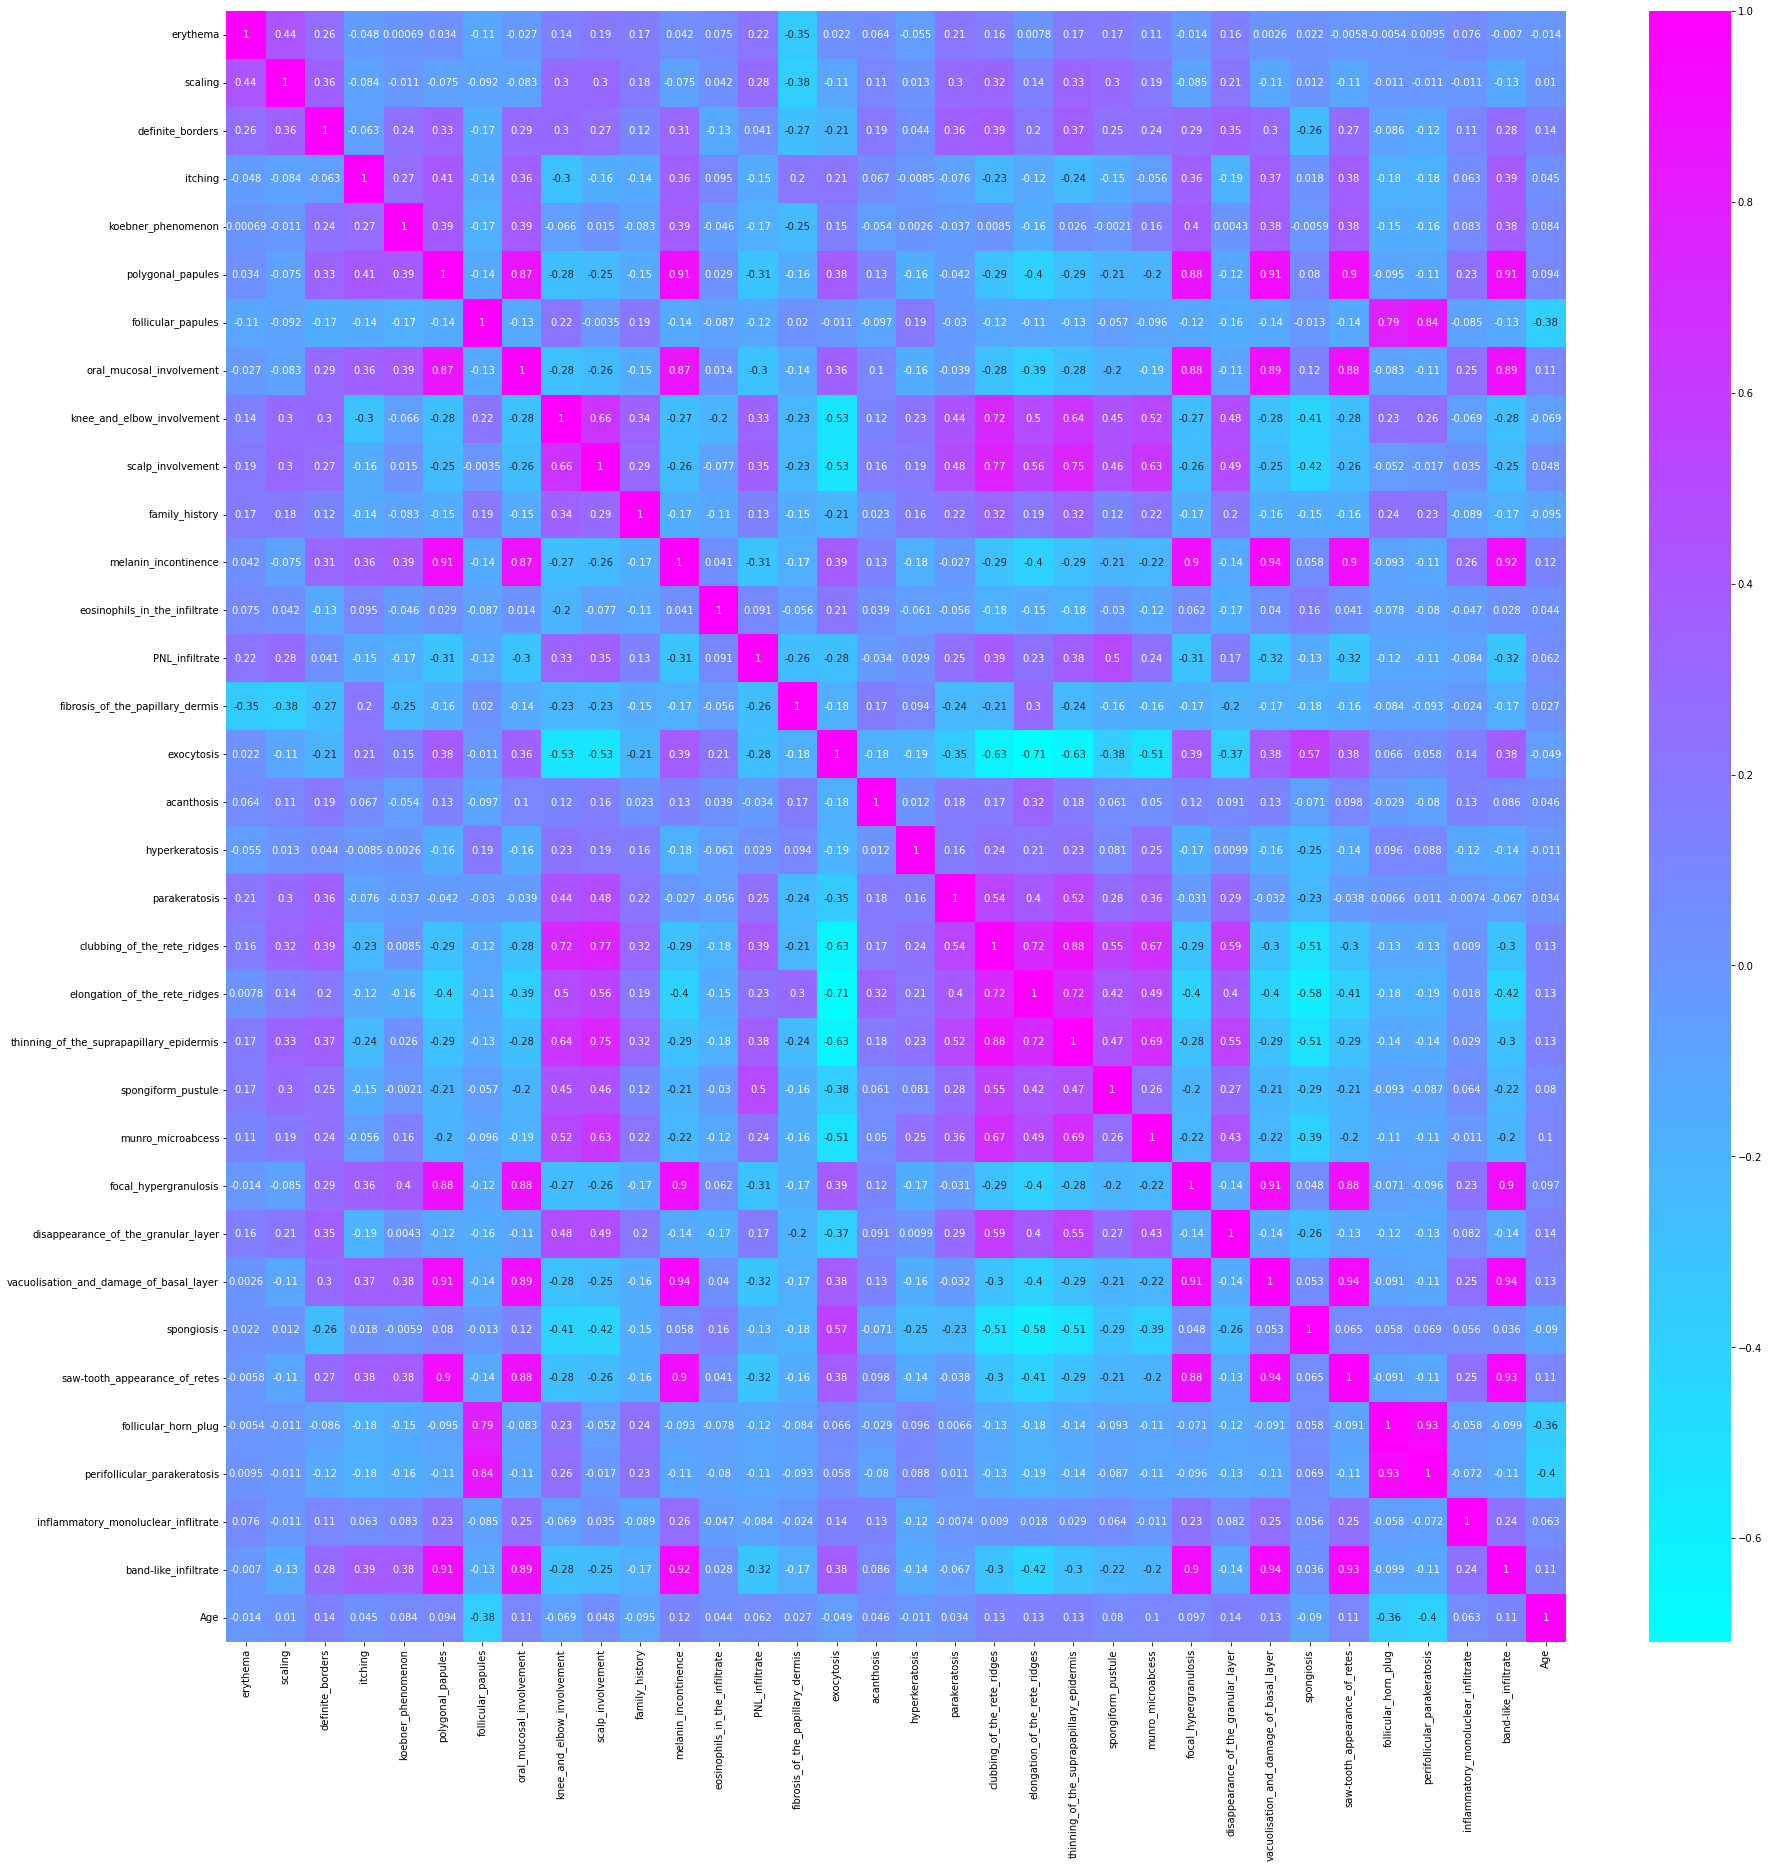

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="cool",annot=True)

### Dropping Highly Co-related Features

In [41]:
data.drop(['polygonal_papules','melanin_incontinence',
           'focal_hypergranulosis','vacuolisation_and_damage_of_basal_layer',
           'saw-tooth_appearance_of_retes','band-like_infiltrate'],axis=1,inplace=True)

# Model Creation

In [67]:
## Defining X and y and creating dependent and independent variables
X = data.drop(columns = ['class']) ## independent variable
y = data['class'] ## Dependent or target variable

In [68]:
X

,erythema,scaling,definite_borders,itching,koebner_phenomenon,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,disappearance_of_the_granular_layer,spongiosis,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,Age
0,2,2,0,3,0,0,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,3,0,0,1,55
1,3,3,3,2,1,0,0,1,1,1,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,1,8
2,2,1,2,3,1,0,3,0,0,0,0,0,0,1,2,0,2,0,0,0,0,0,0,3,0,0,2,26
3,2,2,2,0,0,0,0,3,2,0,0,3,0,0,2,0,3,2,2,2,2,0,3,0,0,0,3,40
4,2,3,2,2,2,0,2,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,2,2,0,0,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,2,25
362,3,2,1,0,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,1,1,0,0,2,36
363,3,2,2,2,3,0,2,0,0,0,2,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,2,28
364,2,1,3,1,2,0,2,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,2,50


In [69]:
y

0      seboreic_dermatitis
1                psoriasis
2            lichen_planus
3                psoriasis
4            lichen_planus
              ...         
361       pityriasis_rosea
362       pityriasis_rosea
363          lichen_planus
364          lichen_planus
365              psoriasis
Name: class, Length: 366, dtype: object

In [70]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)# scaling independent variables

In [71]:
X_scaled #scaled data

array([[-0.1028946 ,  0.29250271, -1.70937509, ..., -0.23512537,
        -1.19445878,  1.24105006],
       [ 1.40348234,  1.71991595,  1.60084334, ..., -0.23512537,
        -1.19445878, -1.88877593],
       [-0.1028946 , -1.13491053,  0.49743719, ..., -0.23512537,
         0.18463243, -0.69011917],
       ...,
       [ 1.40348234,  0.29250271,  0.49743719, ..., -0.23512537,
         0.18463243, -0.55693509],
       [-0.1028946 , -1.13491053,  1.60084334, ..., -0.23512537,
         0.18463243,  0.90808985],
       [ 1.40348234,  0.29250271,  0.49743719, ..., -0.23512537,
         1.56372365, -0.09079079]])

In [72]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 355)#splitting data into train and test

In [73]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
    
log_reg.fit(x_train,y_train)#training model with training data

LogisticRegression()

In [74]:
y_train_pre=log_reg.predict(x_train)# predicting y_train  

Let's see how well our model performs on the test data set.

In [75]:
y_pred = log_reg.predict(x_test) # testing model 

In [76]:
y_train.shape # to know the shape of y_train (rows and columns)

(274,)

In [77]:
y_pred.shape # to know the shape of y_pred (rows and columns )

(92,)

In [78]:
## calculating accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score

In [79]:
#Accuracy
test_accuracy = accuracy_score(y_test,y_pred)
test_accuracy

0.9456521739130435

In [ ]:
# Creating the SVM model
model = OneVsRestClassifier(SVC())

In [98]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.9456521739130435

## Balancing the data using Smote Technique

In [99]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print("unbalanced data:  ",Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data:   Counter({'psoriasis': 112, 'lichen_planus': 72, 'seboreic_dermatitis': 61, 'cronic_dermatitis': 52, 'pityriasis_rosea': 49, 'pityriasis_rubra_pilaris': 20})
balanced data:    : Counter({'seboreic_dermatitis': 112, 'psoriasis': 112, 'lichen_planus': 112, 'cronic_dermatitis': 112, 'pityriasis_rosea': 112, 'pityriasis_rubra_pilaris': 112})


### TRAIN-TEST SPLIT

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.25)

###  MODEL BUILDING

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
y_hat = dt.predict(x_test)

In [103]:
acc=accuracy_score(y_test,y_hat)
acc

0.9345238095238095

###  Evaluation

### Training Accuracy

In [104]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
y_pred=dt.predict(x_train)
print(classification_report(y_train,y_pred))

                          precision    recall  f1-score   support

       cronic_dermatitis       1.00      1.00      1.00        92
           lichen_planus       1.00      1.00      1.00        81
        pityriasis_rosea       1.00      1.00      1.00        83
pityriasis_rubra_pilaris       1.00      1.00      1.00        86
               psoriasis       1.00      1.00      1.00        81
     seboreic_dermatitis       1.00      1.00      1.00        81

                accuracy                           1.00       504
               macro avg       1.00      1.00      1.00       504
            weighted avg       1.00      1.00      1.00       504



In [105]:
pd.crosstab(y_train,y_pred)

col_0,cronic_dermatitis,lichen_planus,pityriasis_rosea,pityriasis_rubra_pilaris,psoriasis,seboreic_dermatitis
class,,,,,,
cronic_dermatitis,92,0,0,0,0,0
lichen_planus,0,81,0,0,0,0
pityriasis_rosea,0,0,83,0,0,0
pityriasis_rubra_pilaris,0,0,0,86,0,0
psoriasis,0,0,0,0,81,0
seboreic_dermatitis,0,0,0,0,0,81


### Testing Accuracy

In [106]:
y_hat=dt.predict(x_test)
y_hat

array(['seboreic_dermatitis', 'seboreic_dermatitis', 'pityriasis_rosea',
       'seboreic_dermatitis', 'psoriasis', 'lichen_planus', 'psoriasis',
       'seboreic_dermatitis', 'pityriasis_rubra_pilaris',
       'seboreic_dermatitis', 'seboreic_dermatitis', 'cronic_dermatitis',
       'cronic_dermatitis', 'pityriasis_rosea', 'psoriasis', 'psoriasis',
       'cronic_dermatitis', 'pityriasis_rubra_pilaris',
       'cronic_dermatitis', 'lichen_planus', 'psoriasis',
       'pityriasis_rubra_pilaris', 'seboreic_dermatitis',
       'cronic_dermatitis', 'seboreic_dermatitis', 'pityriasis_rosea',
       'pityriasis_rosea', 'seboreic_dermatitis', 'lichen_planus',
       'seboreic_dermatitis', 'lichen_planus', 'pityriasis_rubra_pilaris',
       'seboreic_dermatitis', 'psoriasis', 'pityriasis_rosea',
       'cronic_dermatitis', 'lichen_planus', 'lichen_planus', 'psoriasis',
       'seboreic_dermatitis', 'pityriasis_rubra_pilaris', 'psoriasis',
       'seboreic_dermatitis', 'cronic_dermatitis',
   

In [107]:
print(classification_report(y_test,y_hat))

                          precision    recall  f1-score   support

       cronic_dermatitis       1.00      1.00      1.00        20
           lichen_planus       0.91      0.94      0.92        31
        pityriasis_rosea       0.83      0.86      0.85        29
pityriasis_rubra_pilaris       1.00      1.00      1.00        26
               psoriasis       1.00      0.94      0.97        31
     seboreic_dermatitis       0.90      0.90      0.90        31

                accuracy                           0.93       168
               macro avg       0.94      0.94      0.94       168
            weighted avg       0.94      0.93      0.94       168



In [109]:
# Recall
Recall = recall_score(y_test,y_hat,average='weighted')# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.9345238095238095

### USING RANDOM FOREST ENSEMBLE TECHNIQUE TO IMPROVE THE MODEL PERFORMANCE

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc=RandomForestClassifier(n_estimators=450)

In [112]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=450)

In [113]:
y_prediction=rfc.predict(x_test)

In [114]:
print(classification_report(y_test,y_prediction))

                          precision    recall  f1-score   support

       cronic_dermatitis       1.00      1.00      1.00        20
           lichen_planus       1.00      0.94      0.97        31
        pityriasis_rosea       0.97      1.00      0.98        29
pityriasis_rubra_pilaris       1.00      1.00      1.00        26
               psoriasis       1.00      1.00      1.00        31
     seboreic_dermatitis       0.94      0.97      0.95        31

                accuracy                           0.98       168
               macro avg       0.98      0.98      0.98       168
            weighted avg       0.98      0.98      0.98       168



In [115]:
pd.crosstab(y_test,y_prediction)

col_0,cronic_dermatitis,lichen_planus,pityriasis_rosea,pityriasis_rubra_pilaris,psoriasis,seboreic_dermatitis
class,,,,,,
cronic_dermatitis,20,0,0,0,0,0
lichen_planus,0,29,0,0,0,2
pityriasis_rosea,0,0,29,0,0,0
pityriasis_rubra_pilaris,0,0,0,26,0,0
psoriasis,0,0,0,0,31,0
seboreic_dermatitis,0,0,1,0,0,30


In [117]:
# Recall
Recall = recall_score(y_test,y_prediction,average='weighted')# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.9821428571428571

### XGBoost 

In [118]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_gbm=gbm.predict(x_test)#predicting the price

In [119]:
## evaluatin the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
accu_scor=accuracy_score(y_test,y_gbm)
accu_scor

0.9821428571428571

In [120]:
print(classification_report(y_test,y_gbm))


                          precision    recall  f1-score   support

       cronic_dermatitis       1.00      1.00      1.00        20
           lichen_planus       1.00      0.97      0.98        31
        pityriasis_rosea       0.94      1.00      0.97        29
pityriasis_rubra_pilaris       1.00      1.00      1.00        26
               psoriasis       1.00      1.00      1.00        31
     seboreic_dermatitis       0.97      0.94      0.95        31

                accuracy                           0.98       168
               macro avg       0.98      0.98      0.98       168
            weighted avg       0.98      0.98      0.98       168



In [121]:
# Recall
Recall = recall_score(y_test,y_gbm,average='weighted')# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.9821428571428571